# 感情推定

文章から、人間の感情を推定します。

https://qiita.com/toshiyuki_tsutsui/items/604f92dbe6e20a18a17e

# oseti

東北大学の乾・鈴木研究室のページで公開されている日本語評価極性辞書：

http://www.cl.ecei.tohoku.ac.jp/index.php?Open%20Resources%2FJapanese%20Sentiment%20Polarity%20Dictionary
    
を用いたSentiment Analysis (ネガポジ判定) ライブラリ 

https://ikegami-yukino.github.io/oss.html

In [13]:
# 必要なライブラリの読み込み
import oseti

In [24]:
# 感情推定
# ポジティブ：1.0
# ネガティブ：-1.0
analyzer = oseti.Analyzer()
analyzer.analyze('私は、先週の日曜日に、東京へ観光へ行きました。')

[1.0]

In [28]:
# 感情推定
# ポジティブ：1.0
# ネガティブ：-1.0
analyzer = oseti.Analyzer()
analyzer.analyze('糞みたいな接客をされて、腹が立ったが、料理はおいしかった。')

[-0.3333333333333333]

In [26]:
# 感情推定
# ポジティブ：1.0
# ネガティブ：-1.0
analyzer = oseti.Analyzer()
analyzer.analyze('普通の飲食店で、いつも通り食事をした。')

[0]

In [29]:
# より詳しい解析
# 感情推定
# ポジティブ：1.0
# ネガティブ：-1.0
analyzer = oseti.Analyzer()
analyzer.count_polarity('私は、先週の日曜日に、東京へ観光へ行きました。糞みたいな接客をされて、腹が立ったが、料理はおいしかった。')

[{'positive': 1, 'negative': 0}, {'positive': 1, 'negative': 2}]

# 実践編

小説の感情推移を見てみる

In [50]:
# データの読み込み
with open('./data/sanshiro.txt', encoding='sjis') as file:
    text = file.read()

# テキスト整形
import re
text = re.split('\-{5,}',text)[2]
text = re.split('底本：',text)[0]
text = text.replace('|', '')
text = re.sub('《.+?》', '', text)
text = re.sub('［＃.+?］', '',text)
text = re.sub('\n\n', '\n', text) 
text = re.sub('\r', '', text)
text = re.sub('　', '', text)
text = re.sub(' ', '', text)

text_list = text.split('。')

In [45]:
# 時系列的なネガポジ数の推移を記録する
positive_list=[]
negative_list=[]
positive_count = 0
negative_count = 0
for i in range(int(len(text_list)/10)):
    analyzer = oseti.Analyzer()
    for text in text_list[i*10:i*10+10]:
        posi_nega = analyzer.count_polarity(text)
        positive_count += posi_nega[0]['positive']
        negative_count += posi_nega[0]['negative']
        positive_list.append(positive_count)
        negative_list.append(negative_count)

In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
# グラフの日本語設定
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams['figure.figsize'] = 20, 5

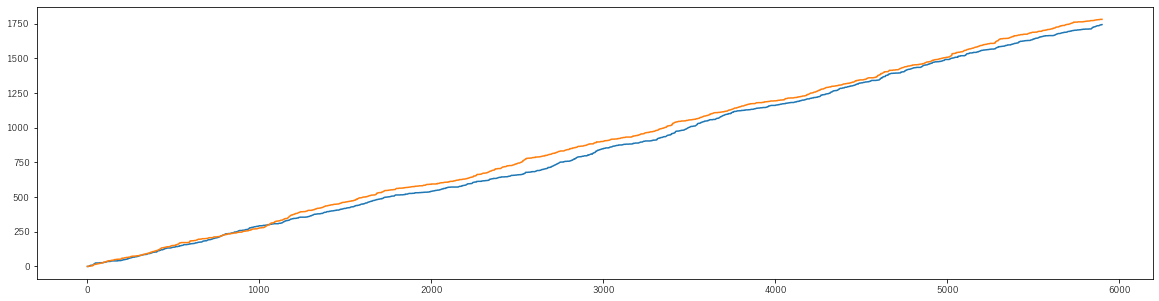

In [47]:
plt.plot(positive_list)
plt.plot(negative_list)
plt.show()

# 実際の使い方

文章の感情を推定できれば、ユーザがある事象に対し、どのような立場にあるかがわかります。

実務では、特定の事象について言及している、Twitterのツイートの感情分析をし、事象がユーザの心理に与える影響などを調査できます。